In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#establish csv (invoices) & json (customers) files 
df= pd.read_csv("./fct_invoice.csv")
js=pd.read_json("./dim_customer.json")

In [13]:
print(js.to_string()) 

       age   first_name gender     id    last_name
0     48.0     Nicholas      M      0       Flores
1      NaN      Jeffery      M      1         Rowe
2     57.0       Alexis      F      2       Benton
3     73.0          Amy      F      3      Johnson
4     20.0        David      M      4        Moore
5      NaN       Thomas      M      5    Alexander
6     83.0       George      M      6      Ramirez
7      NaN        Julia      F      7     Robinson
8     23.0     Patricia      F      8    Rasmussen
9     25.0         Dean      M      9       Dillon
10    80.0      Abigail      F     10       Nelson
11    55.0      Brianna      F     11       Moreno
12     NaN        David      M     12         Wood
13     NaN       Robert      M     13         Tran
14    47.0        David      M     14        Meyer
15    48.0         John      M     15        Berry
16    63.0        Jason      M     16       Fisher
17     NaN     Veronica      F     17      Santana
18    28.0       Adrian      M 

In [15]:
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [79]:
print("EASY")

#1. How many unique customers are in the dataset?
js["fullname"] = js["first_name"]+" " + js["last_name"]
print("1. Number of Unique Customers = ", js["fullname"].nunique())
    #explanation: to get the number of unique customers in the data set, i made a new column combining the first and last name to get the full name. from that, i used the nunique() function to count the number of unique names

#2. What are the different categories of products available? How many unique categories are there?
categories = []
for x in df["category"]:
    if x not in categories:
        categories.append(x)
    else:
        continue
print("2. There are " , df["category"].nunique(), " categories. Specifically: ", categories)
    #explanation: to get the different categories, i made a loop to make a list of theunique categories in the "category" column of df. Afterwards, i used nunique to put the # of categories available.


#3. Which payment method is the most popular? How many times was it used?
print("3. Cash is the most popular payment method as it was used 44447 times based on the data below:")
df.groupby(by=["payment_method"]).count()["invoice_no"]

    #explanation: i used the groupby & count function to show how many invoices matched each payment method, which told me that Cash was used the most

EASY
1. Number of Unique Customers =  4992
2. There are  8  categories. Specifically:  ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
3. Cash is the most popular payment method as it was used 44447 times based on the data below:


payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: invoice_no, dtype: int64

MEDIUM
1. Based on the data below, the three most popular categories (by total sales) are Clothing, Shoes, and Technology.
category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: total, dtype: float64
 
2. Total Sales from customers over the age of 45 =  82039768.14999999
 
3. In order to assess the seasonal trends among the invoice dates, I made a line graph to show the monthly distribution of invoices, illustrating the number of invoices during each month. From this, we can see that February always has the least sales per year.


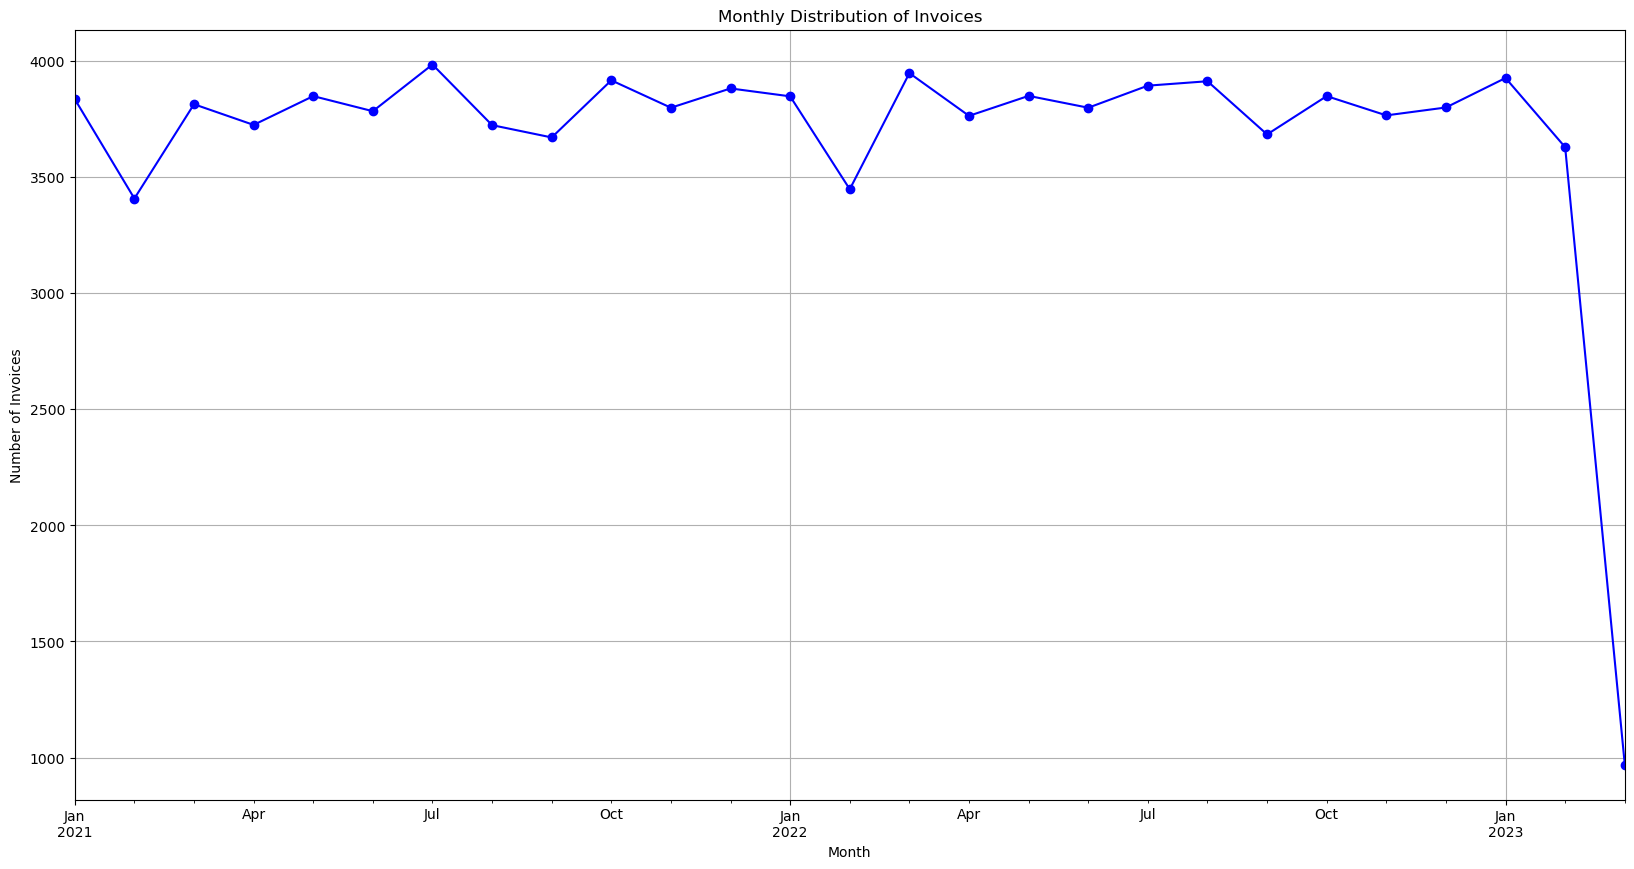

In [232]:
print("MEDIUM")
#1. What are the three most popular categories, by total sales?
df["total"] = df["quantity"] * df["price"] #make new column to give total per order
print("1. Based on the data below, the three most popular categories (by total sales) are Clothing, Shoes, and Technology.")
print(df.groupby(by=["category"]).sum()["total"])
print(" ")

#2. What are the total sales attributed to customers over the age of 45?
mdf = df.set_index("customer_id").join(js.set_index("id")) #merge both datasets by customer_id -> made new dataset
ageddf = mdf[mdf["age"] > 45] #new dataset full of people over 45
print("2. Total Sales from customers over the age of 45 = ", ageddf["total"].sum()) #get total of sales from new dataset of people over 45
print(" ")

#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
print("3. In order to assess the seasonal trends among the invoice dates, I made a line graph to show the monthly distribution of invoices, illustrating the number of invoices during each month. From this, we can see that February always has the least sales per year.")
timedf = df.copy()
timedf["invoice_date"] = pd.to_datetime(df["invoice_date"], dayfirst=True, format = "%d/%m/%Y")
timedf['invoice_month'] = timedf["invoice_date"].dt.to_period('M')
invoices = timedf.groupby(timedf['invoice_date'].dt.to_period('M')).size()

plt.figure(figsize=(20, 10))
invoices.plot(kind='line', marker='o', color='b')
plt.title('Monthly Distribution of Invoices')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.show()

In [298]:
print("HARD")
#1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

# Make a new column for the age ranges
bins = [10, 20, 30, 40, 50, 60, float('inf')]
ranges = ['10-19', '20-29', '30-39', '40-49', '50-59', '60+']
mdf['age_range'] = pd.cut(mdf['age'], bins=bins, labels=ranges, right=False) #make new column for age ranges

# Make the Pivot table
print("Pivot Table showing the Breakdown of Sales across different Categories and Customer Age Ranges")
pivot_table = pd.pivot_table(mdf, values='total', index='category', columns='age_range', aggfunc='sum', fill_value=0)
print(pivot_table)

HARD
Pivot Table showing the Breakdown of Sales across different Categories and Customer Age Ranges
age_range             10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_range              50-59          60+  
category                                   
Books               74962.20    161968.65  
Clothing         10321851.76  22923711.36  
Cosmetics          5877